#### Task 3 – Mini Data Project
    Download a sample CSV file (can be from https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html or one provided by the instructor). Then:

    1.Load the data using pandas.
    2.Display the first 5 rows.
    3.Show summary statistics using .describe().
    4.Use numpy to calculate the mean of a numeric column manually (not with .mean()).
    5.Create a bar chart of one categorical variable using matplotlib.
    6.Create a histogram of a numerical column using seaborn.
    7.Label your charts properly (title, x, y labels).
    Submit: Plots in a Jupyter notebook with brief descriptions.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<strong>1. Loading the data using pandas.

In [3]:
df = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/biostats.csv')

<strong>2. Displaying the first 5 rows.

In [5]:
print(df)

    Name       "Sex"   "Age"   "Height (in)"   "Weight (lbs)"
0   Alex         "M"      41              74              170
1   Bert         "M"      42              68              166
2   Carl         "M"      32              70              155
3   Dave         "M"      39              72              167
4   Elly         "F"      30              66              124
5   Fran         "F"      33              66              115
6   Gwen         "F"      26              64              121
7   Hank         "M"      30              71              158
8   Ivan         "M"      53              72              175
9   Jake         "M"      32              69              143
10  Kate         "F"      47              69              139
11  Luke         "M"      34              72              163
12  Myra         "F"      23              62               98
13  Neil         "M"      36              75              160
14  Omar         "M"      38              70              145
15  Page

<strong>3. Showing summary statistics using .describe().

In [6]:
print(df.describe())

           "Age"  "Height (in)"  "Weight (lbs)"
count  18.000000      18.000000       18.000000
mean   34.666667      69.055556      146.722222
std     7.577055       3.522570       22.540958
min    23.000000      62.000000       98.000000
25%    30.000000      66.250000      132.000000
50%    32.500000      69.500000      150.000000
75%    38.750000      71.750000      165.250000
max    53.000000      75.000000      176.000000


<strong> 4. Using numpy to calculate the mean of a numeric column manually (not with .mean()).

<strong> Clean up column names

In [7]:
df.columns = df.columns.str.strip('" "')

In [8]:
print(df.head())

   Name         Sex  Age  Height (in)  Weight (lbs)
0  Alex         "M"   41           74           170
1  Bert         "M"   42           68           166
2  Carl         "M"   32           70           155
3  Dave         "M"   39           72           167
4  Elly         "F"   30           66           124


Here, Used **pd.to_numeric** with **errors='coerce'** to convert **non-numeric** values to **NaN**

In [9]:
# List of numeric columns to compute mean:
numeric_columns = ['Age', 'Height (in)', 'Weight (lbs)']
# Loop through and calculate mean manually for each column
for column in numeric_columns:
    values = pd.to_numeric(df[column], errors = 'coerce').dropna()
    manual_mean = np.sum(values)/ len(values)
    print(f"Manual Mean of '{column}': {manual_mean}")

Manual Mean of 'Age': 34.666666666666664
Manual Mean of 'Height (in)': 69.05555555555556
Manual Mean of 'Weight (lbs)': 146.72222222222223


In [10]:
df['Sex'] = df['Sex'].str.strip()    # Clean values inside 'Sex' column
df['Sex'] = df['Sex'].replace({'"M"': 'M', '"F"': 'F'})

In [11]:
# Count occurrences of 'M' and 'F' in the 'Sex' column
sex_count = df['Sex'].value_counts()

In [12]:
print(sex_count)

Sex
M    11
F     7
Name: count, dtype: int64


<strong>5.Create a bar chart of one categorical variable using matplotlib.

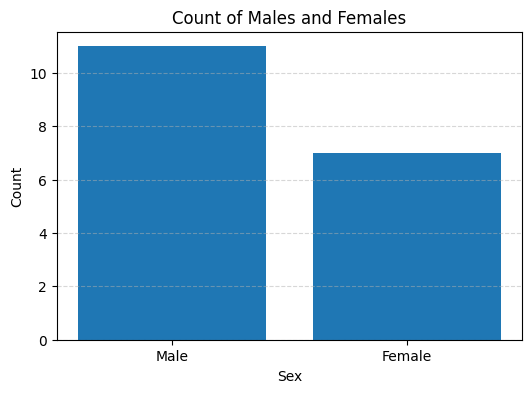

In [13]:
plt.figure(figsize=(6,4))
plt.title("Count of Males and Females")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.bar(sex_count.index, sex_count.values)
plt.xticks(['M', 'F'], ['Male', 'Female'])
plt.show()

<strong>6.Create a histogram of a numerical column using seaborn.

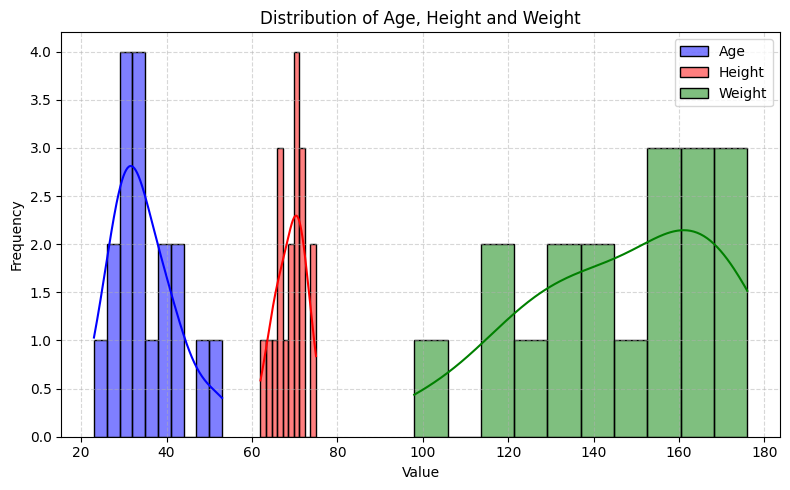

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Numeric columns: Age, Height and Weight from the dataset
plt.figure(figsize=(8, 5))

sns.histplot(df['Age'], color='blue', label='Age', kde=True, bins=10, alpha=0.5)
sns.histplot(df['Height (in)'], color= 'red', label= 'Height', kde = True, bins=10, alpha=0.5)
sns.histplot(df['Weight (lbs)'], color='green', label='Weight', kde=True, bins=10, alpha=0.5)

plt.title('Distribution of Age, Height and Weight')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Mini Data Project: Step-by-Step Data Analysis

This project involves analyzing a sample dataset using Python libraries like `pandas`, `numpy`, `matplotlib`, and `seaborn`. Below is a detailed breakdown of the tasks and their implementation.

---

## **Task Overview**
The project includes the following steps:
1. **Load the Data**
2. **Display the First 5 Rows**
3. **Summary Statistics**
4. **Calculate Mean Manually**
5. **Bar Chart of a Categorical Variable**
6. **Histogram of a Numerical Column**
7. **Chart Labeling**

---

## **1. Load the Data**
- The dataset is loaded from a URL using `pandas.read_csv()`.
- The CSV file contains columns such as:
    - `Age`
    - `Height (in)`
    - `Weight (lbs)`
    - `Sex`

---

## **2. Display the First 5 Rows**
- The first few rows of the dataset are displayed using `print(df.head())`.
- This helps understand the structure of the data.

---

## **3. Summary Statistics**
- Summary statistics of numeric columns are generated using `df.describe()`.
- Insights provided include:
    - Mean
    - Standard deviation
    - Minimum and maximum values
    - Quartiles

---

## **4. Calculate Mean Manually**
- Instead of using pandas' built-in `.mean()` method, the mean of numeric columns (`Age`, `Height (in)`, `Weight (lbs)`) is calculated manually using `numpy`:
    1. Non-numeric values are converted to `NaN` using `pd.to_numeric(errors='coerce')`.
    2. The mean is calculated as:
         \[
         \text{Mean} = \frac{\text{Sum of values}}{\text{Count of non-NaN values}}
         \]

---

## **5. Bar Chart of a Categorical Variable**
- The `Sex` column is cleaned (e.g., removing extra spaces or quotes).
- A bar chart is created using `matplotlib` to show the count of males (`M`) and females (`F`) in the dataset.
- The chart includes:
    - Title
    - X-axis and Y-axis labels

---

## **6. Histogram of a Numerical Column**
- A histogram is created using `seaborn` to visualize the distribution of numeric columns (`Age`, `Height (in)`, `Weight (lbs)`).
- Features of the histogram:
    - Kernel Density Estimation (KDE) for smooth distribution curves.
    - Different colors for each variable.
    - Proper labels and a legend for clarity.

---

## **7. Chart Labeling**
- Both the bar chart and histogram are properly labeled to make the visualizations informative and easy to interpret:
    - Titles
    - Axis labels
    - Legends